In [2]:
import pandas as pd
import geopandas as gpd

### Ore deposits

In [54]:
gdf = gpd.read_file('./data/US_ore_deposits/TightOil_ShalePlays_US_EIA_May2016.shp')
gdf

,Basin,Lithology,Shale_play,Source,Area_sq_mi,Area_sq_km,Age_shale,geometry
0,Valley and Ridge,Shale,Conasauga,EIA,2223.551552,5758.972081,Cambrian,POLYGON ((-87.37001799899997 33.01457200000004...
1,Black Warrior,Shale,Chattanooga,EIA,695.668275,1801.772561,Devonian,POLYGON ((-86.64281299899994 33.81607400000007...
2,Black Warrior,Shale,Floyd-Chattanooga,EIA,1466.582399,3798.430975,Miss-Devonian,POLYGON ((-88.62561500099997 32.52085600000004...
3,Black Warrior,Shale,Floyd-Neal,EIA,5191.296394,13445.395936,Mississippian,POLYGON ((-88.22560199899993 33.81165000000004...
4,Ardmore,Shale,Woodford,EIA,1200.315850,3108.803781,Devonian,POLYGON ((-96.45930899999996 34.05160700000005...
5,Arkoma,Shale,Fayetteville,EIA,5852.694747,15158.409807,Mississippian,POLYGON ((-94.27770099999998 35.20242300000007...
6,Cherokee,Shale,Excello-Mulky,EIA,8119.637516,21029.764625,Pennsylvanian,POLYGON ((-95.89765699999998 35.81647100000004...
7,Forest City,Shale,Excello-Mulky,EIA,184.825558,478.695997,Pennsylvanian,POLYGON ((-94.69423499999999 38.78321000000005...
8,Ft. Worth,Shale,Barnett,EIA,26311.402850,68146.220539,Mississippian,POLYGON ((-99.47179999999997 33.55444000000006...
9,Greater Green River,MIxed Shale & Chalk,HilliardBaxterMancos-Niobrara,EIA,17932.327832,46444.515868,Cretaceous,"POLYGON ((-107.312979001 41.70205400100008, -1..."


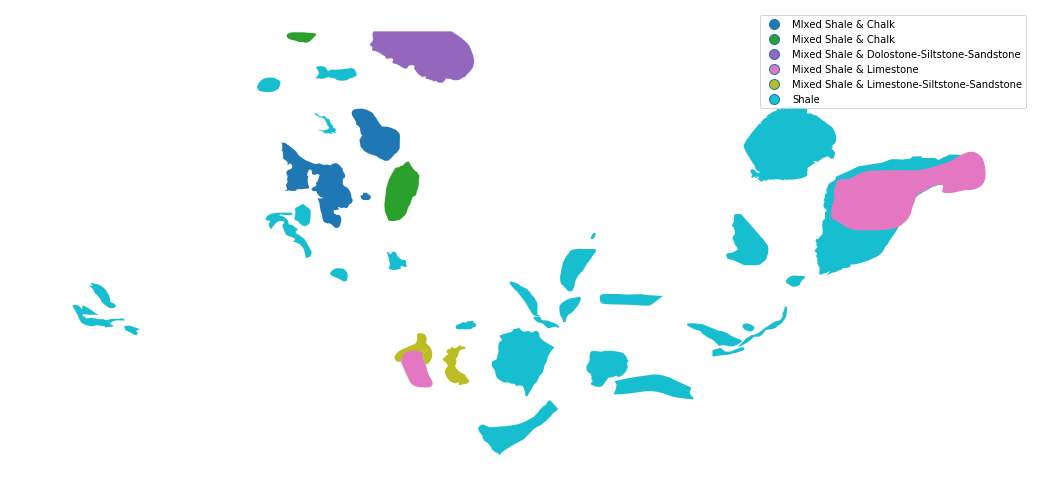

In [53]:
ax = gdf.plot(column='Lithology', figsize = (18, 10), legend = True)
ax.set_axis_off()

### Land cover

In [4]:
gdf = gpd.read_file('./data/US_land_use/na70_lushp.shp', encoding = 'utf-8')

LUC_dict = {1 : 'Mostly cropland',
2 : 'Cropland with grazing land',
3 : 'Cropland with pasture, woodland, and forest',
4 : 'Irrigated land',
5 : 'Woodland and forest with some cropland and pasture',
6 : 'Forest and woodland mostly grazed',
7 : 'Forest and woodland mostly ungrazed',
8 : 'Subhumid grassland and semiarid grazing land',
9 : 'Open woodland grazed (pinon, juniper, aspen groves,\
chaparral and brush)',
10 : 'Desert shrubland grazed',
11 : 'Desert shrubland mostly ungrazed',
12 : 'Alpine meadows, mountain peaks above timber line, \
sparse dry tundra, lava flows, and barren land',
13 : 'Swamp',
14 : 'Marshland',
15 : 'Moist tundra and muskeg',
16 : 'Urban areas',
17 : 'Open water',
99 : 'Great Lakes, Canada'}

Simple_LUC_dict = {1 : 'Cropland',
2 : 'Cropland',
3 : 'Cropland',
4 : 'Cropland',
5 : 'Woodland',
6 : 'Woodland',
7 : 'Woodland',
8 : 'Grassland',
9 : 'Woodland',
10 : 'Desert',
11 : 'Desert',
12 : 'Other',
13 : 'Other',
14 : 'Other',
15 : 'Moist tundra and muskeg',
16 : 'Urban',
17 : 'Water',
99 : 'Water'}

gdf['Use'] = gdf['LUC'].map(LUC_dict)
gdf['Use'] = gdf['LUC'].map(Simple_LUC_dict)

In [5]:
use_area = gdf.groupby('Use')['AREA'].sum().sort_values()
100*use_area/use_area.sum()

Use
Urban         0.958930
Other         2.547315
Water         4.034483
Desert       11.124216
Grassland    12.431885
Woodland     31.592582
Cropland     37.310590
Name: AREA, dtype: float64

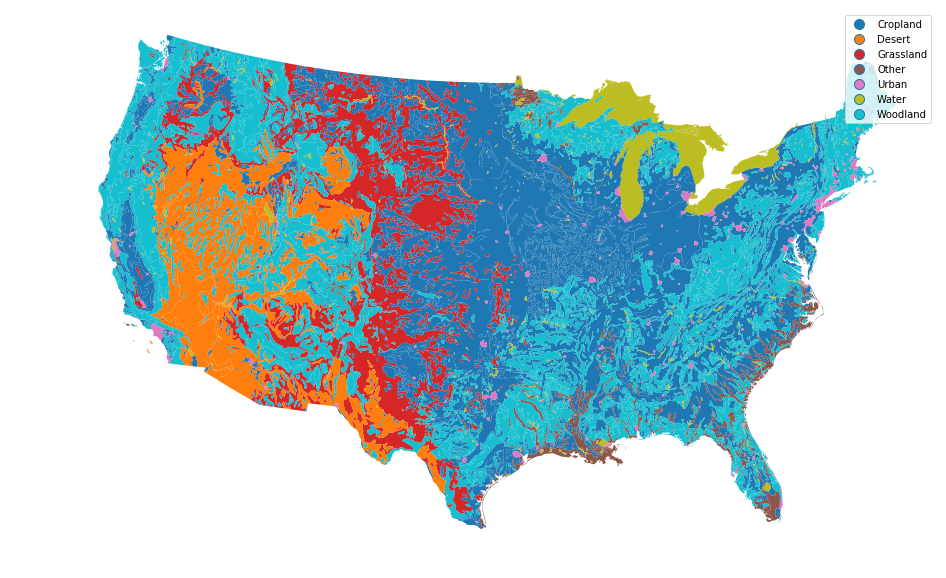

In [8]:
ax = gdf.plot(column='Use', figsize = (18, 10), legend = True)
ax.set_axis_off()

In [38]:
gdf_dissolved = gdf.dissolve(by='Use')[['geometry']].reset_index() #[['AREA','geometry']]

In [152]:

counties = gpd.read_file('./data/cb_2017_us_county_500k/cb_2017_us_county_500k.shp')
counties['area_fips'] = counties.STATEFP + counties.COUNTYFP
counties = counties[['area_fips','NAME','geometry']].reset_index(drop = True)


In [155]:
df1 = counties
df2 = gdf_dissolved

if df1.crs!=df2.crs:
    print('Data has different projections.')
    print('Converted data to projection of first GeoPandas DatFrame')
    df2.to_crs(crs=df1.crs, inplace=True)
    
# 
# testdf.sort_values(by = 'NAME').plot(column = 'Use', figsize = (18, 10))

In [156]:
joined = gpd.tools.overlay(df1, df2, 'intersection')
# joined = gpd.sjoin(df1, df2.reset_index(), how = 'left')

joined['area_km2'] = joined.to_crs({'init': 'epsg:3857'})['geometry'].area/1e6

joined['land_use_frac'] = joined.groupby('NAME')['area_km2'].apply(lambda x: x / float(x.sum()))

joined.sort_values(by = 'NAME')

,area_fips,NAME,Use,geometry,area_km2,land_use_frac
9328,45001,Abbeville,Woodland,(POLYGON ((-82.27831870673987 34.0996448155094...,476.858662,0.245660
9327,45001,Abbeville,Cropland,(POLYGON ((-82.59227420710297 34.3045166320540...,1464.271414,0.754340
600,22001,Acadia,Cropland,(POLYGON ((-92.37880549226119 30.4801332235777...,1438.218055,0.627594
598,22001,Acadia,Other,POLYGON ((-92.62947085079794 30.31792782436186...,853.418675,0.372406
17966,51001,Accomack,Woodland,(POLYGON ((-75.26604272367635 38.0250933267085...,542.363749,0.299148
17965,51001,Accomack,Cropland,(POLYGON ((-75.89901233634393 37.6116905389688...,1211.676430,0.668316
17963,51001,Accomack,Other,(POLYGON ((-75.54705249482232 37.7554855112870...,58.989364,0.032536
11126,16001,Ada,Cropland,(POLYGON ((-115.9748744287346 43.3980581321027...,1186.229355,0.227496
11123,16001,Ada,Grassland,POLYGON ((-116.0838604331552 43.66255940762018...,42.910615,0.008229
11128,16001,Ada,Water,POLYGON ((-115.9803976570681 43.58603543218472...,53.549119,0.010270


In [160]:
land_use_frac = joined.set_index(['area_fips', 'Use'])[['land_use_frac']].unstack().fillna(0)['land_use_frac']
land_use_frac.to_csv('./data/US_land_use/land_use_frac.csv')

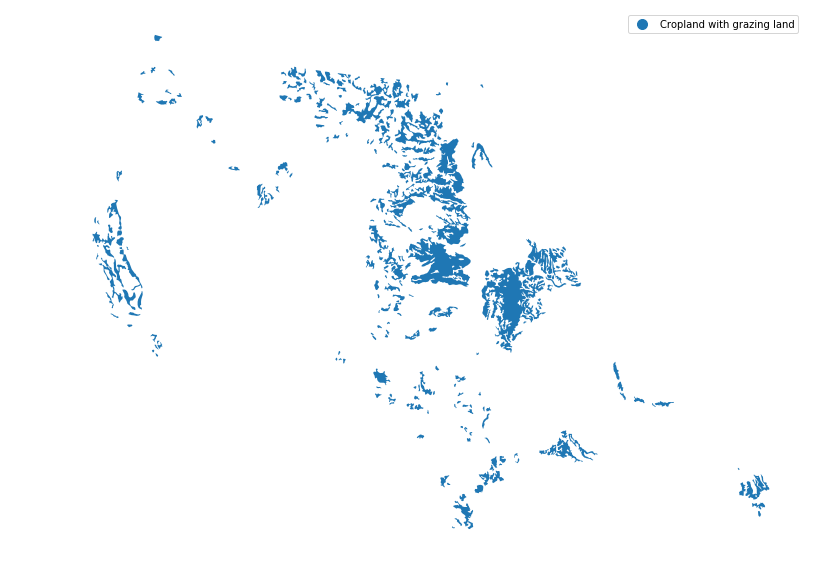

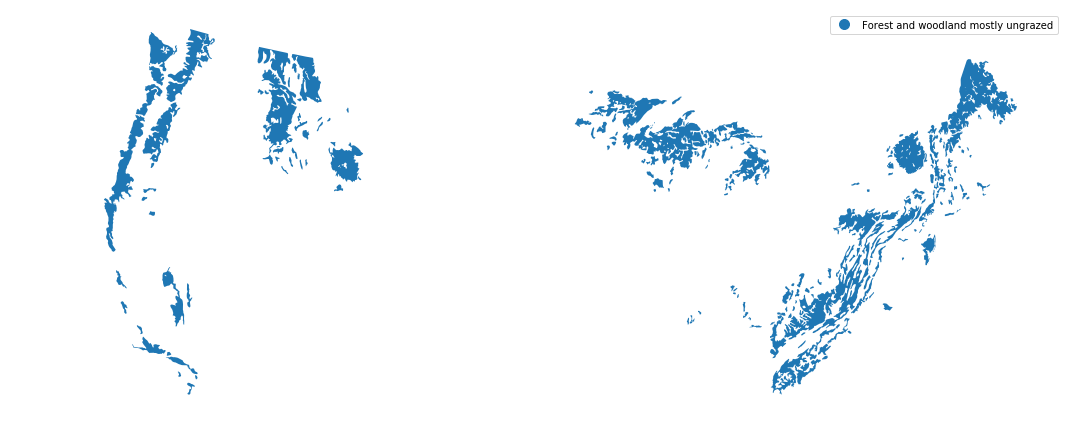

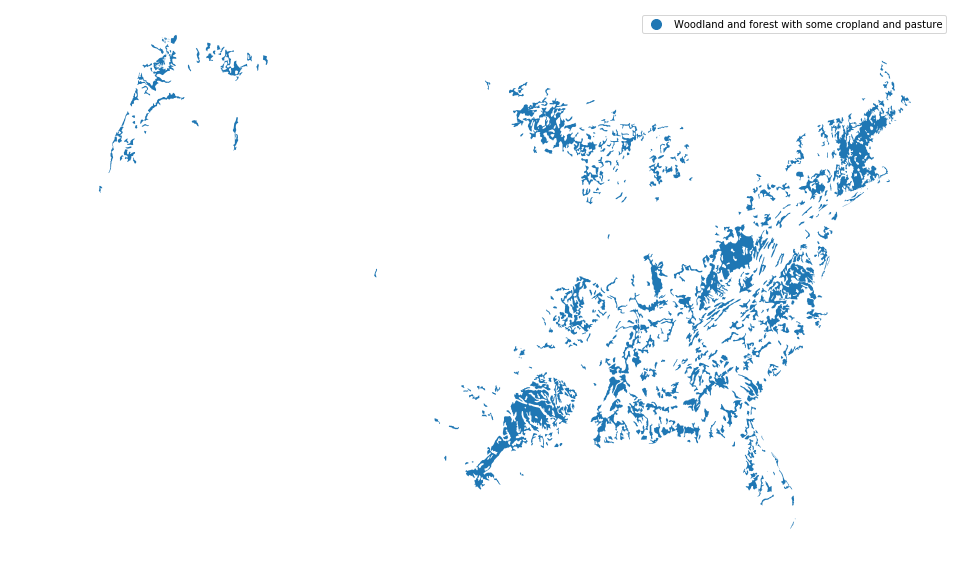

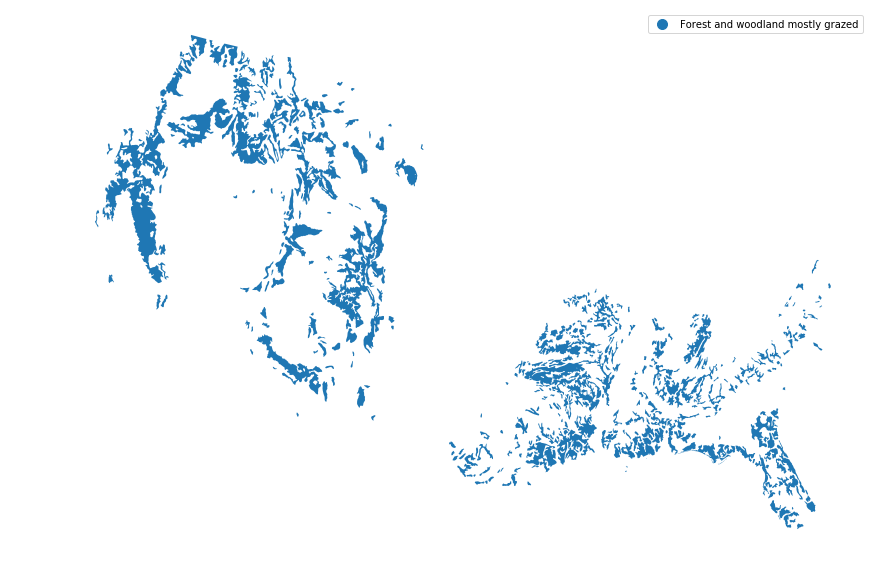

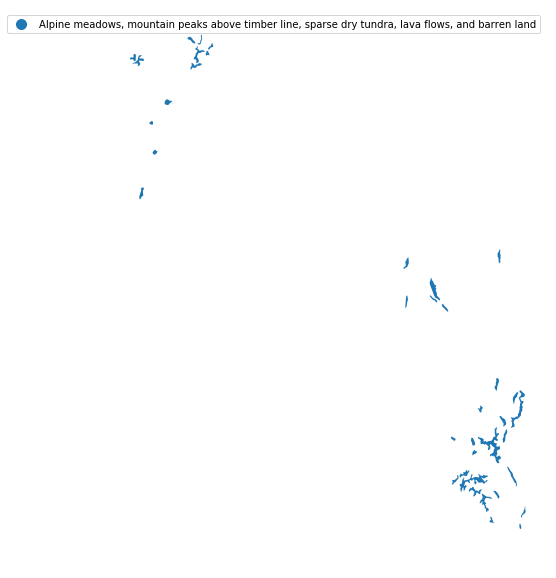

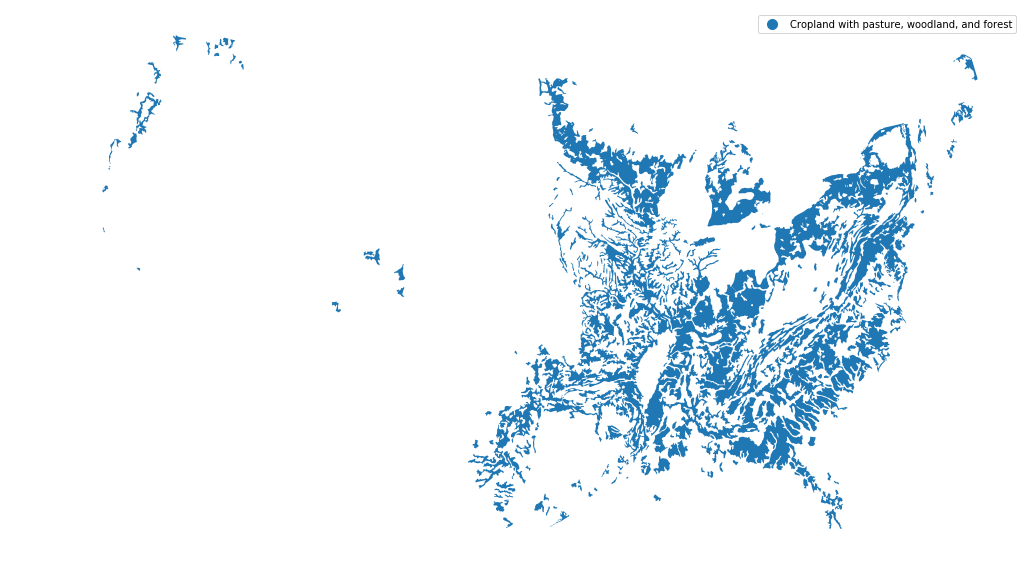

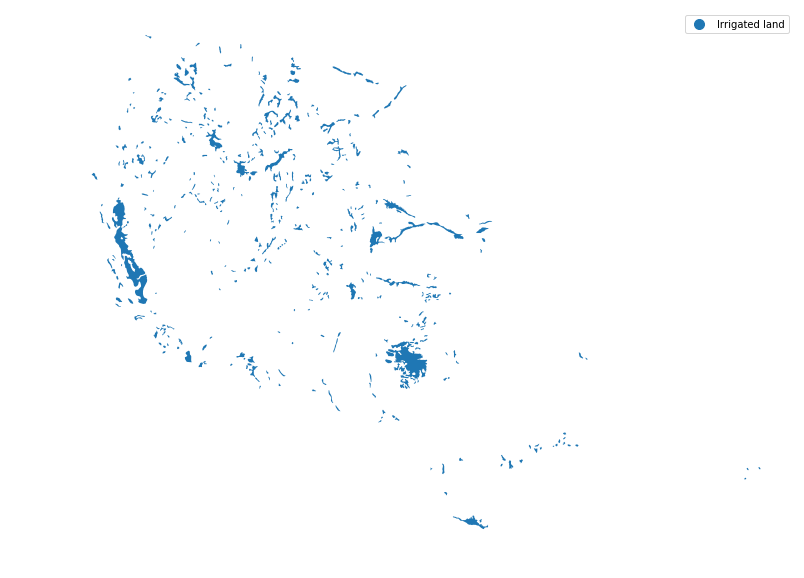

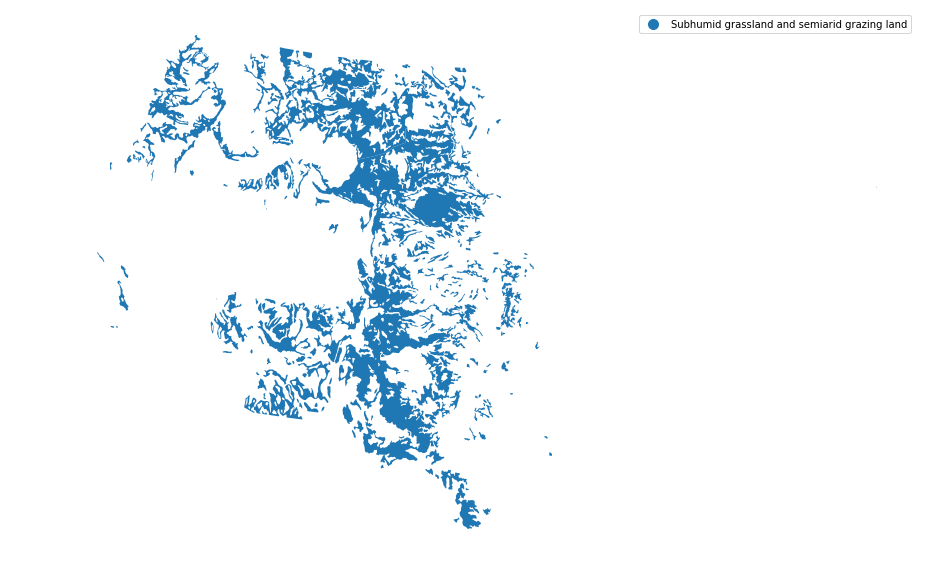

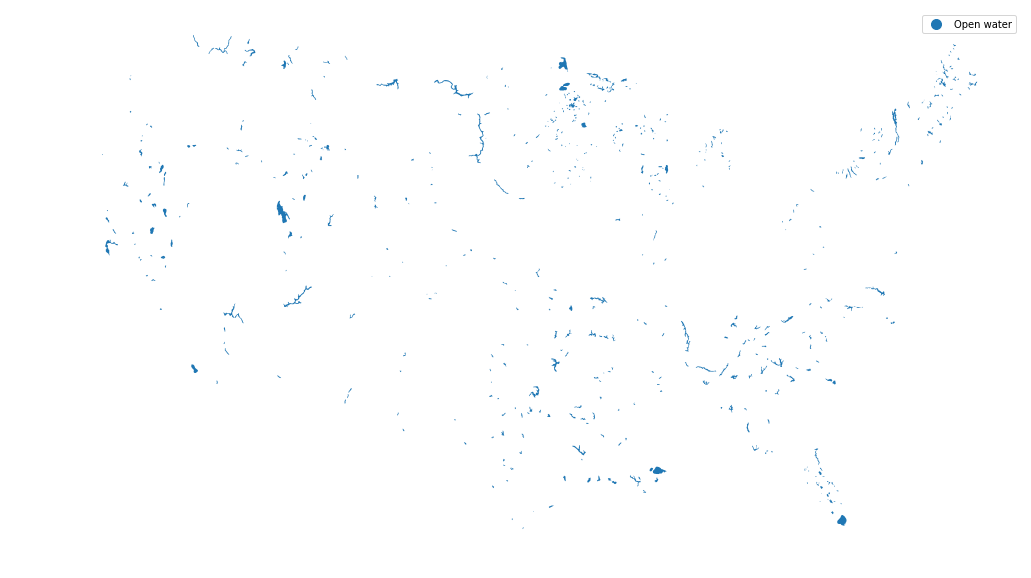

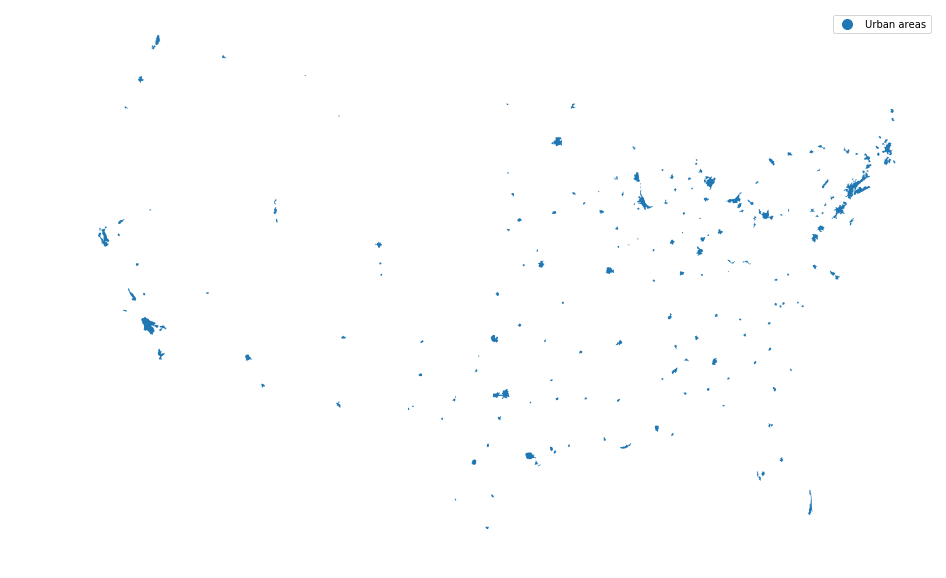

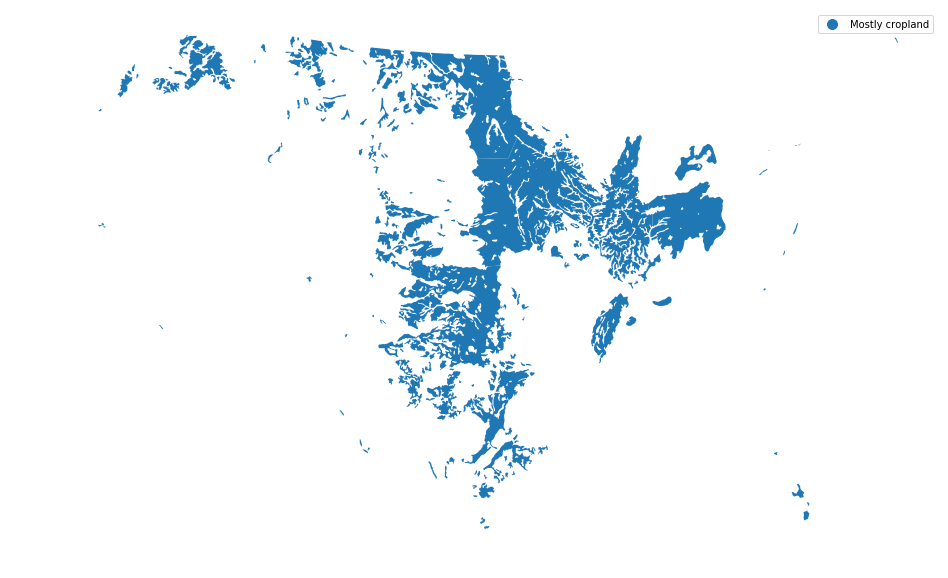

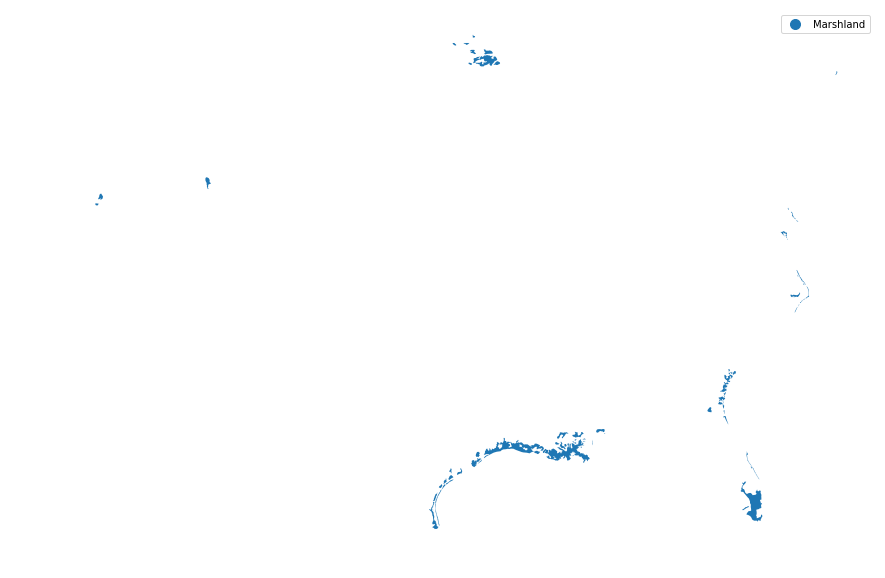

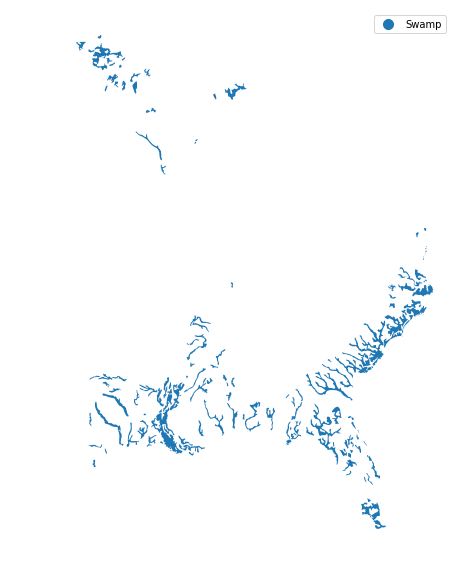

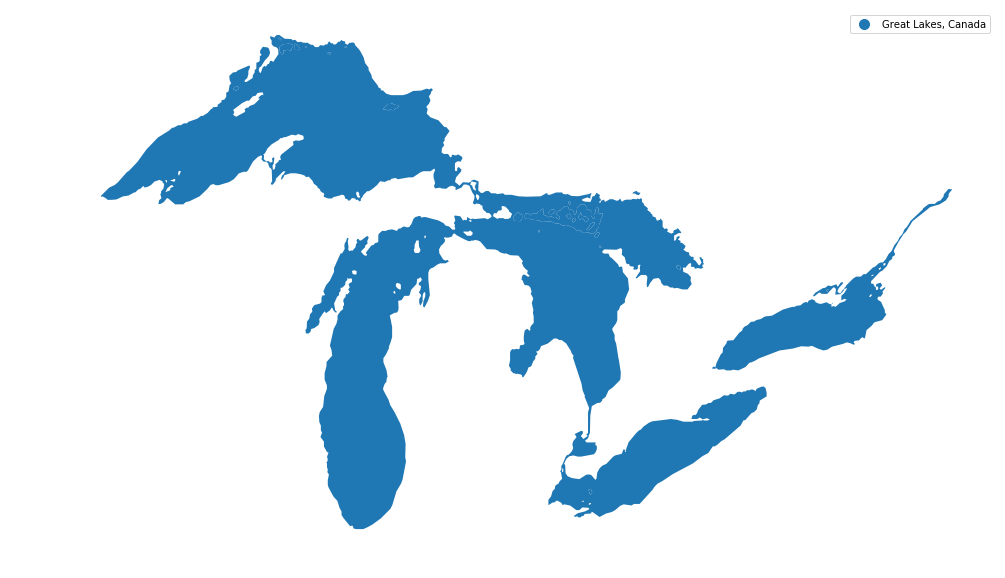

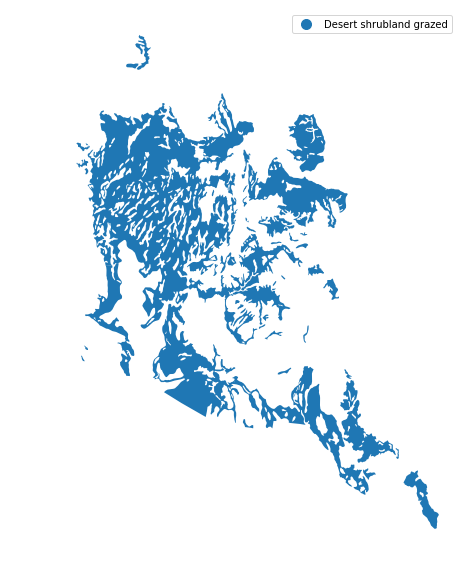

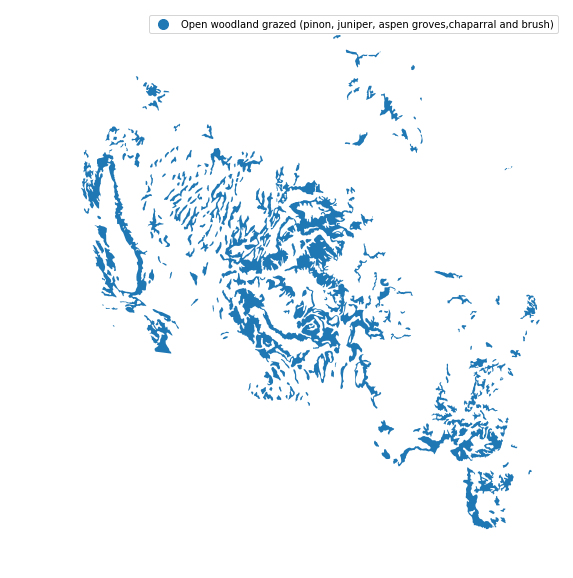

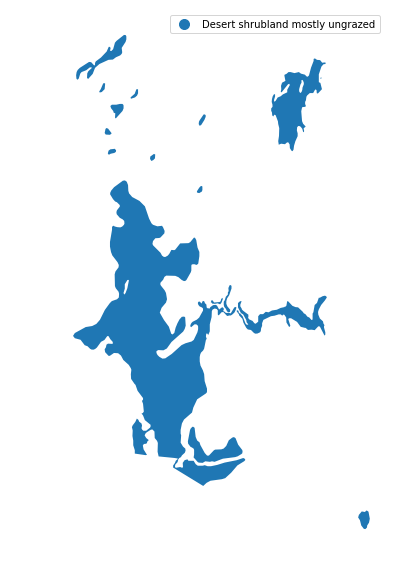

In [34]:
for use in gdf.Use.unique():
    ax = gdf.loc[gdf.Use == use].plot(column='Use', figsize = (18, 10), legend = True)
    ax.set_axis_off()